In [258]:
from fbprophet import Prophet
import ccxt
import pandas as pd

In [259]:
symbol_data_map = {
    'ETH': 'ETH/USDT',
    'BTC': 'BTC/USDT'
}


In [260]:
def get_data(symbol):
    binance = ccxt.binance()
    # each ohlcv candle is a list of [ timestamp, open, high, low, close, volume ]
    return binance.fetchOHLCV(symbol_data_map[symbol], timeframe='1m', params={})

In [261]:
exchange_id = 'binance'
exchange_class = getattr(ccxt, exchange_id)
exchange = exchange_class({
    'apiKey': '',
    'secret': '',
})

binance_markets = exchange.load_markets()


In [262]:
backtest_duration = 30

In [263]:
d = get_data('ETH')

In [264]:
df = pd.DataFrame(d)

In [265]:
df = df
df

,0,1,2,3,4,5
0,1622655060000,2744.71,2751.51,2744.71,2751.48,516.22198
1,1622655120000,2751.49,2755.99,2751.49,2755.21,389.29957
2,1622655180000,2755.21,2757.31,2755.00,2755.52,381.64988
3,1622655240000,2755.52,2756.87,2752.68,2756.61,393.81571
4,1622655300000,2756.62,2759.16,2756.05,2756.47,490.54709
...,...,...,...,...,...,...
495,1622684760000,2687.06,2689.47,2683.67,2684.82,485.84449
496,1622684820000,2684.82,2689.91,2681.92,2687.65,356.57346
497,1622684880000,2687.64,2689.56,2685.98,2689.54,297.55366
498,1622684940000,2689.34,2689.51,2685.96,2686.94,561.34055


In [266]:
df[6] = pd.to_datetime(df[0],unit='ms')


In [267]:
df_filtered = df[[1,6]]
df_filtered.columns = ['y', 'ds']
actual = df_filtered[len(df_filtered)-backtest_duration:]
df_filtered = df_filtered[:len(df_filtered)-backtest_duration]
print(actual)
print(df_filtered)

           y                  ds
470  2712.91 2021-06-03 01:21:00
471  2712.00 2021-06-03 01:22:00
472  2705.00 2021-06-03 01:23:00
473  2710.15 2021-06-03 01:24:00
474  2710.75 2021-06-03 01:25:00
475  2710.02 2021-06-03 01:26:00
476  2707.23 2021-06-03 01:27:00
477  2709.05 2021-06-03 01:28:00
478  2708.30 2021-06-03 01:29:00
479  2707.56 2021-06-03 01:30:00
480  2698.64 2021-06-03 01:31:00
481  2697.48 2021-06-03 01:32:00
482  2691.01 2021-06-03 01:33:00
483  2695.73 2021-06-03 01:34:00
484  2694.24 2021-06-03 01:35:00
485  2697.30 2021-06-03 01:36:00
486  2700.00 2021-06-03 01:37:00
487  2699.27 2021-06-03 01:38:00
488  2698.81 2021-06-03 01:39:00
489  2699.00 2021-06-03 01:40:00
490  2698.16 2021-06-03 01:41:00
491  2694.55 2021-06-03 01:42:00
492  2690.57 2021-06-03 01:43:00
493  2694.72 2021-06-03 01:44:00
494  2691.97 2021-06-03 01:45:00
495  2687.06 2021-06-03 01:46:00
496  2684.82 2021-06-03 01:47:00
497  2687.64 2021-06-03 01:48:00
498  2689.34 2021-06-03 01:49:00
499  2686.

In [268]:
m = Prophet()
m.fit(df_filtered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [269]:
future = m.make_future_dataframe(periods=backtest_duration, freq='1min')
future.tail(backtest_duration*2)

,ds
440,2021-06-03 00:51:00
441,2021-06-03 00:52:00
442,2021-06-03 00:53:00
443,2021-06-03 00:54:00
444,2021-06-03 00:55:00
445,2021-06-03 00:56:00
446,2021-06-03 00:57:00
447,2021-06-03 00:58:00
448,2021-06-03 00:59:00
449,2021-06-03 01:00:00


In [270]:
forecast = m.predict(future)

predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
predictions.head(10)


,ds,yhat,yhat_lower,yhat_upper
0,2021-06-02 17:31:00,2754.892707,2747.921925,2761.699647
1,2021-06-02 17:32:00,2755.325302,2748.037021,2762.972316
2,2021-06-02 17:33:00,2755.757897,2748.284610,2762.854225
3,2021-06-02 17:34:00,2756.190492,2749.091456,2763.732068
4,2021-06-02 17:35:00,2756.623088,2749.360641,2763.935867
5,2021-06-02 17:36:00,2757.055683,2750.095028,2764.616626
6,2021-06-02 17:37:00,2757.488278,2749.830703,2764.300919
7,2021-06-02 17:38:00,2757.920873,2750.885927,2765.489302
8,2021-06-02 17:39:00,2758.353468,2751.093815,2765.513177
9,2021-06-02 17:40:00,2758.786064,2751.630611,2765.965986


In [271]:
actual


,y,ds
470,2712.91,2021-06-03 01:21:00
471,2712.00,2021-06-03 01:22:00
472,2705.00,2021-06-03 01:23:00
473,2710.15,2021-06-03 01:24:00
474,2710.75,2021-06-03 01:25:00
475,2710.02,2021-06-03 01:26:00
476,2707.23,2021-06-03 01:27:00
477,2709.05,2021-06-03 01:28:00
478,2708.30,2021-06-03 01:29:00
479,2707.56,2021-06-03 01:30:00


In [272]:
actual_arr = actual[['y']].to_numpy()
actual_arr

array([[2712.91],
       [2712.  ],
       [2705.  ],
       [2710.15],
       [2710.75],
       [2710.02],
       [2707.23],
       [2709.05],
       [2708.3 ],
       [2707.56],
       [2698.64],
       [2697.48],
       [2691.01],
       [2695.73],
       [2694.24],
       [2697.3 ],
       [2700.  ],
       [2699.27],
       [2698.81],
       [2699.  ],
       [2698.16],
       [2694.55],
       [2690.57],
       [2694.72],
       [2691.97],
       [2687.06],
       [2684.82],
       [2687.64],
       [2689.34],
       [2686.93]])

In [273]:
predictions.tail(backtest_duration)


,ds,yhat,yhat_lower,yhat_upper
470,2021-06-03 01:21:00,2702.624023,2695.689440,2710.158217
471,2021-06-03 01:22:00,2702.575506,2695.219989,2710.002191
472,2021-06-03 01:23:00,2702.526989,2694.913698,2709.539440
473,2021-06-03 01:24:00,2702.478472,2695.391633,2710.102091
474,2021-06-03 01:25:00,2702.429955,2694.879732,2709.709921
475,2021-06-03 01:26:00,2702.381438,2694.848083,2709.691394
476,2021-06-03 01:27:00,2702.332921,2694.499838,2710.163105
477,2021-06-03 01:28:00,2702.284405,2694.420949,2710.167027
478,2021-06-03 01:29:00,2702.235888,2694.350151,2710.103903
479,2021-06-03 01:30:00,2702.187371,2694.402990,2709.844189


In [274]:
predictions_arr = predictions[len(predictions)-backtest_duration:][['yhat']].to_numpy()
predictions_arr

array([[2702.62402256],
       [2702.57550571],
       [2702.52698885],
       [2702.478472  ],
       [2702.42995515],
       [2702.3814383 ],
       [2702.33292145],
       [2702.28440459],
       [2702.23588774],
       [2702.18737089],
       [2702.13885404],
       [2702.09033719],
       [2702.04182034],
       [2701.99330348],
       [2701.94478663],
       [2701.89626978],
       [2701.84775293],
       [2701.79923608],
       [2701.75071922],
       [2701.70220237],
       [2701.65368552],
       [2701.60516867],
       [2701.55665182],
       [2701.50813497],
       [2701.45961811],
       [2701.41110126],
       [2701.36258441],
       [2701.31406756],
       [2701.26555071],
       [2701.21703385]])

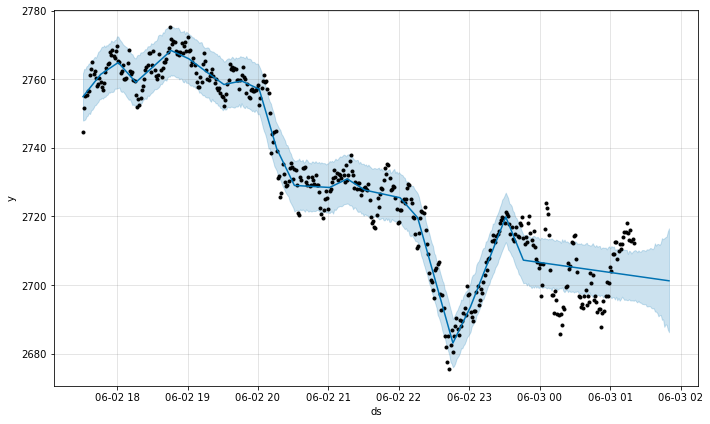

In [275]:
fig1 = m.plot(forecast)


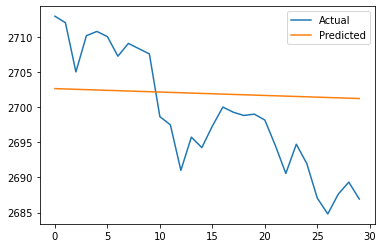

In [276]:
import matplotlib.pyplot as plt
  
# plot lines
plt.plot(actual_arr,label = "Actual")
plt.plot(predictions_arr,label = "Predicted")
plt.legend()

plt.show()